<a href="https://colab.research.google.com/github/nilanka76/ML-Practice-codes/blob/main/Ml_exam_techtree_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Dataset = files.upload()

Saving 2015.csv to 2015.csv


In [100]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("2015.csv")
dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [98]:

x = dataset.drop(columns=['Country', 'Region', 'Happiness Score', 'Happiness Rank', 'Standard Error', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
y = dataset["Happiness Score"]
x

,Economy (GDP per Capita),Health (Life Expectancy)
0,1.39651,0.94143
1,1.30232,0.94784
2,1.32548,0.87464
3,1.45900,0.88521
4,1.32629,0.90563
...,...,...
153,0.22208,0.42864
154,0.28665,0.31910
155,0.66320,0.72193
156,0.01530,0.22396


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test), len(y), len(y_train), len(y_test)

(158, 126, 32, 158, 126, 32)

In [ ]:
model = tf.keras.Sequential([                      
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                   
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

history = model.fit(x_train, y_train, epochs=20, verbose=1)
print("Finished")

Epoch 1/20
4/4 [==============================] - 0s 4ms/step - loss: 4.3956 - mae: 4.3956
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.6210 - mae: 1.6210
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4263 - mae: 1.4263
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8203 - mae: 0.8203
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0687 - mae: 1.0687
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7466 - mae: 0.7466
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.8305 - mae: 0.8305
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6383 - mae: 0.6383
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6776 - mae: 0.6776
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6131 - mae: 0.6131
Epoch 11/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6454 - mae: 0.64

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 100ms/step - loss: 0.6123 - mae: 0.6123


[0.6123480796813965, 0.6123480796813965]

Text(0, 0.5, 'loss')

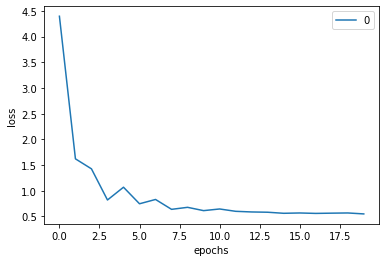

In [ ]:
#Loss Curve/Training Curve
pd.DataFrame(history.history['loss']).plot()

plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
tf.round(y_test)

<tf.Tensor: shape=(32,), dtype=float64, numpy=
array([4., 6., 4., 3., 5., 7., 5., 5., 5., 4., 7., 6., 7., 6., 7., 7., 5.,
       5., 5., 6., 4., 7., 7., 7., 6., 5., 6., 4., 4., 4., 4., 5.])>

In [ ]:
def pred(Economy, Health):
  model_pred = model.predict([[Economy, Health]])
  if model_pred > [[6]]:
    print(f"score is {model_pred} = Happy")
  elif model_pred > [[4]]:
    print(f"score is {model_pred} = Satisfactory")
  else:
    print(f"score is {model_pred} = Unsatisfied")


In [ ]:
pred(Economy=0.7, Health= 0.9)

score is [[5.81478]] = Satisfactory
